# **Motorbike Ambulance Calls**
>Motorbike accidents and corresponded ambulance calls are highly depended on environmental and seasonal settings, like weather conditions, precipitation, day of week, season, hour of the day, etc. The data was aggregated over the course of two years, on hourly basis, and then extracted and extended with the corresponding weather and seasonal information.


## **Associated tasks**

---


**Regression**

Prediction of the hourly ambulance calls count based on the environmental and seasonal settings. Prediction model should provide monotonic in the terms of some features, if it is proved by data.

**Event and Anomaly Detection**

Define the  ambulance calls patterns with respect of special events and define the cases that might be considered as abnormal behavior.  

**Deliverables**

Full Texts Report that contains detail description of Data Analysis, Data Modelling and Patterns/Anomaly detection processes with conclusions and their explanations.
What is important here:
* See the **way you’re thinking** – what actions you’re implementing and why
* How **you code** and wrangle the data
* **Storytelling** capabilities – so we’re looking for the full-text structured report separately from the code/notebook
* **Suggestions** on the further  analytics/approaches which could be applied

## **Dataset characteristics:**

---



motorbike_ambulance_calls.csv has the following fields:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls


In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, kurtosis

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

anomaly detection:

+-3 сігми статистика

Isolation forest, boosting 

Quartile персентилі чекнуть

xgboost regression

Вивести аномалії

LOF

День ніч поділити



треба спліт на 2 роки

feature importance

boxcox

polynomial nonlinear autoregressive integrated moving average with external input (NARIMAX) - pip install sysidentpy4

Кинути це на black box 

Бібліотека profit

Skewness  до кожної нумерікал дати

Куртосіс(довжина хвостів)

Висновки енгленд



In [121]:
motorbike_df = pd.read_csv("data/motorbike_ambulance_calls.csv")
motorbike_df

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,1/1/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,1/1/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,1/1/11,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,1/1/11,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,12/31/12,spring,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,17376,12/31/12,spring,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,17377,12/31/12,spring,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,17378,12/31/12,spring,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [19]:
motorbike_df.shape

(17379, 15)

In [20]:
motorbike_df.isna().sum()

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [21]:
motorbike_df.drop_duplicates()

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,1/1/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,1/1/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,1/1/11,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,1/1/11,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,12/31/12,spring,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,17376,12/31/12,spring,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,17377,12/31/12,spring,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,17378,12/31/12,spring,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [22]:
motorbike_df.describe()

,index,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,5017.0295,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


First thing first, we're changing **Season** feature from string to categorical variable. And also **Date** to datetime format.

In [23]:
motorbike_df["season"].unique()

array(['spring', 'summer', 'autumn', 'winter'], dtype=object)

In [24]:
motorbike_df["date"] = pd.to_datetime(motorbike_df["date"]) # YYYY-MM-DD
motorbike_df["date"]

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: date, Length: 17379, dtype: datetime64[ns]

In [25]:
# 0 - Winter, 1 - Spring, 2 - Summer, 3 - Fall
def convertSeason(date):
    if date.month in [3, 4, 5]:
        return 1
    elif date.month in [6, 7, 8]:
        return 2
    elif date.month in [9, 10, 11]:
        return 3
    else: return 0


motorbike_df["season"] = motorbike_df["date"].apply(convertSeason)

motorbike_df.sample(10)

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
1084,1085,2011-02-17,0,0,2,22,0,4,1,1,0.50,0.4848,0.59,0.2836,76
1730,1731,2011-03-17,1,0,3,18,0,4,1,2,0.46,0.4545,0.59,0.1642,310
16920,16921,2012-12-12,0,1,12,19,0,3,1,2,0.30,0.2879,0.56,0.2239,402
17112,17113,2012-12-20,0,1,12,19,0,4,1,3,0.34,0.3182,0.71,0.2537,118
16428,16429,2012-11-22,3,1,11,6,1,4,0,1,0.26,0.2727,0.70,0.1045,17
5359,5360,2011-08-16,2,0,8,5,0,2,1,1,0.62,0.5909,0.73,0.2836,30
8716,8717,2012-01-04,0,1,1,0,0,3,1,1,0.08,0.0606,0.42,0.3284,9
4694,4695,2011-07-19,2,0,7,12,0,2,1,1,0.84,0.8182,0.56,0.0896,153
9647,9648,2012-02-11,0,1,2,22,0,6,0,2,0.14,0.1061,0.39,0.3881,46
6038,6039,2011-09-14,3,0,9,4,0,3,1,1,0.60,0.5606,0.83,0.0896,9


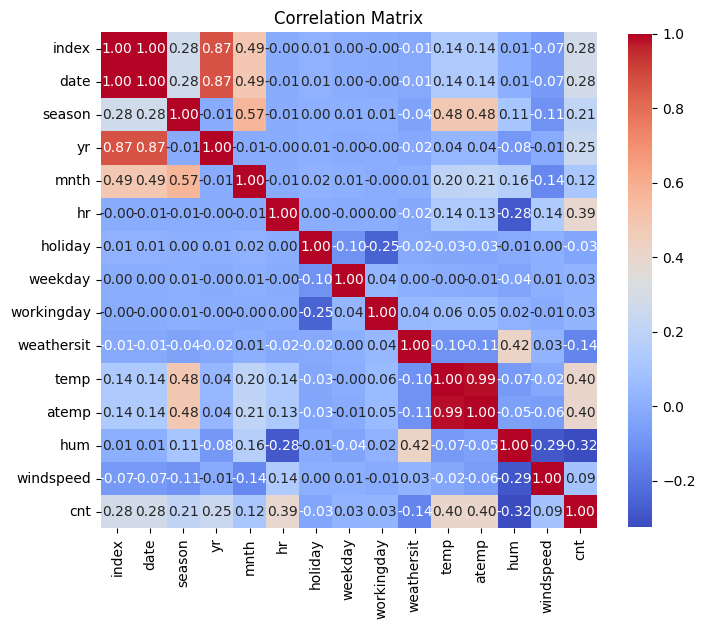

In [26]:
correlation_matrix = motorbike_df.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

According to Correlation Matrix we can see that some variables have a little bit correlation with each other, for instance: **hum**, **windspeed** and **weathersit**. \
Features **temp** and **atemp** are completely multicollinear. We can drop one of them \
Also, we can see interesting corellation between our target feature (**cnt**) and **temp**, **hum**. It's means that there is some relationship between the weather conditions and ambulance calls.

In [27]:
motorbike_df = motorbike_df.drop(columns=["atemp"])

In [28]:
categorical_vars = motorbike_df.select_dtypes(include='int').columns
categorical_vars = categorical_vars[1:len(categorical_vars) - 1]
categorical_vars

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

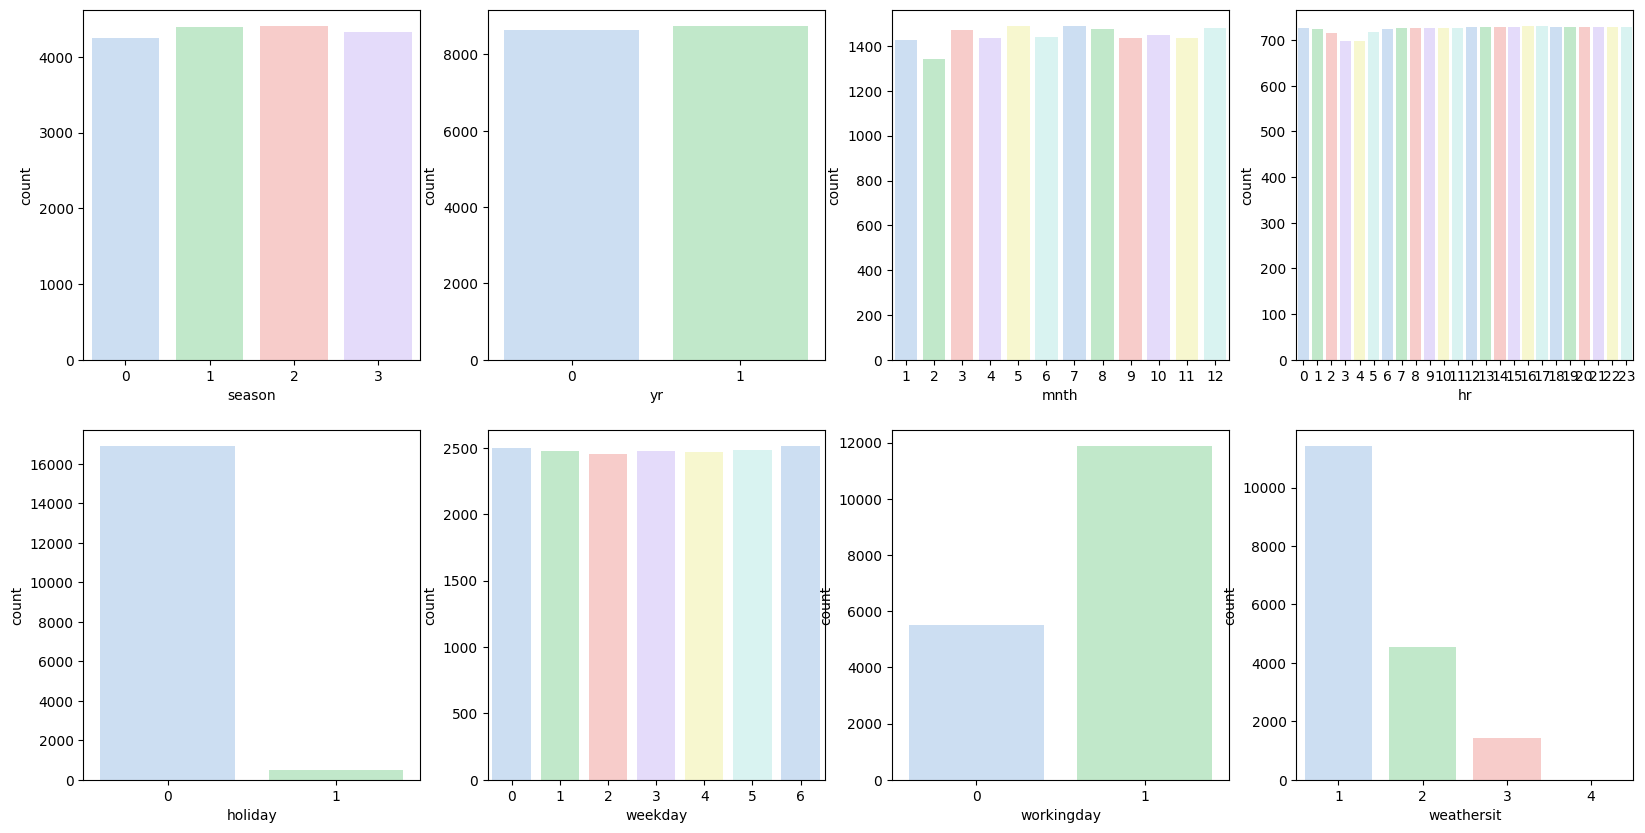

In [ ]:
_, ax = plt.subplots(2, 4, figsize=(20, 10))
for col, subplot in zip(categorical_vars, ax.flatten()):
    sns.countplot(data=motorbike_df, x=col, palette="pastel6", ax=subplot, alpha=0.6)

Categorical columns **LGTM!**

In [37]:
data_numerical = motorbike_df.loc[:, ["temp", "hum", "windspeed"]]
data_numerical

,temp,hum,windspeed
0,0.24,0.81,0.0000
1,0.22,0.80,0.0000
2,0.22,0.80,0.0000
3,0.24,0.75,0.0000
4,0.24,0.75,0.0000
...,...,...,...
17374,0.26,0.60,0.1642
17375,0.26,0.60,0.1642
17376,0.26,0.60,0.1642
17377,0.26,0.56,0.1343


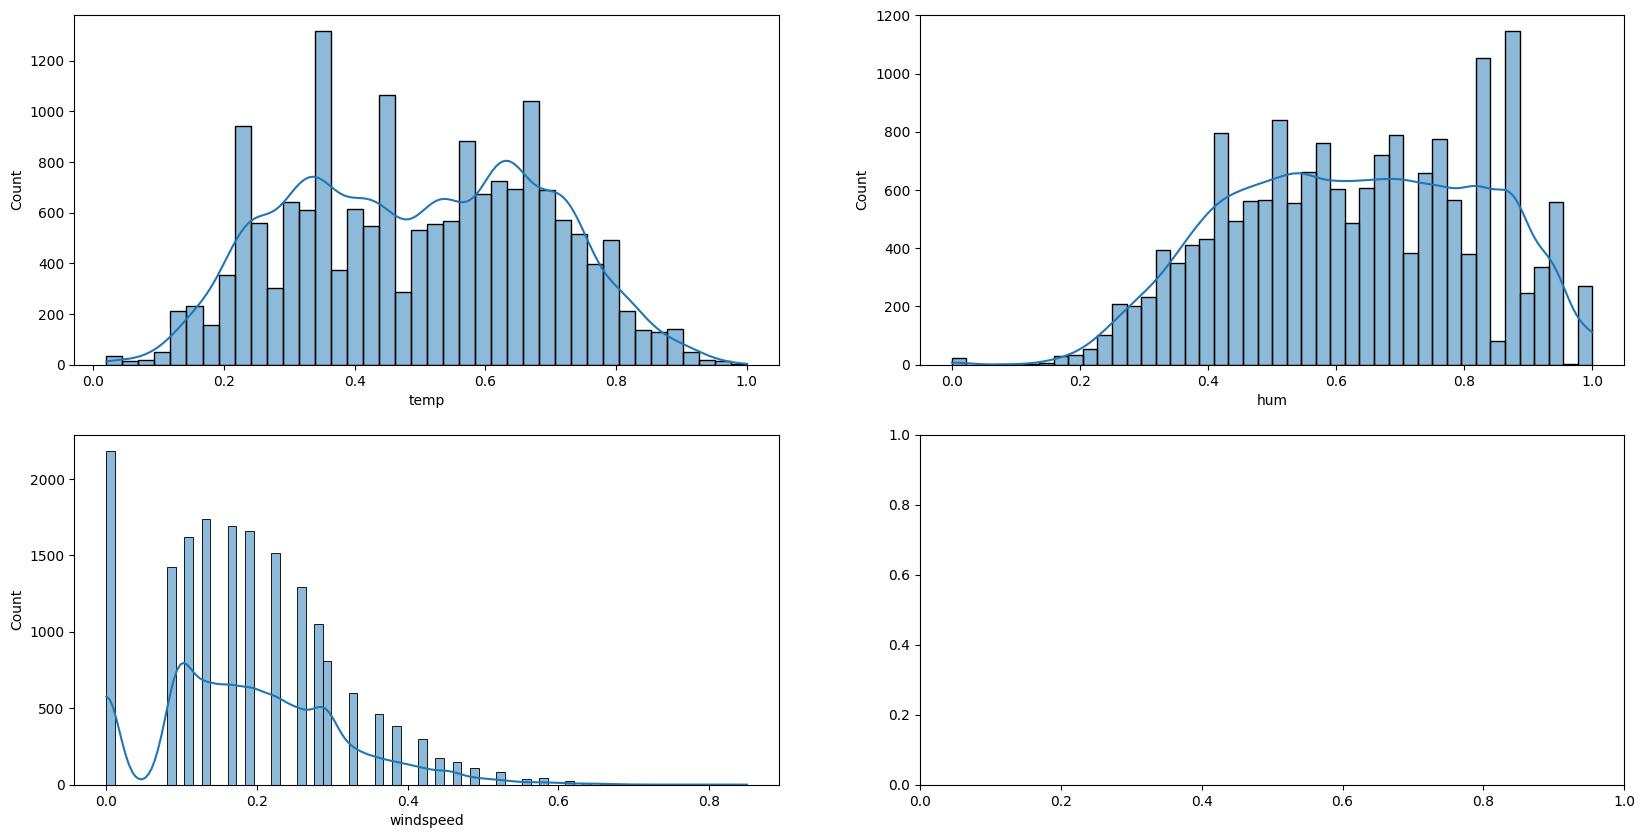

In [ ]:
_, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(data_numerical, ax.flatten()):
  sns.histplot(data=data_numerical, x=variable, ax=subplot, palette='pastel6', kde=True)

So, based on the temperature we can see that it's pretty much looking like Bimodal Distribution. \
Humidity also looks good, we have a little tail at front. \
And windspeed, most ambulance calls were done when there almost was not wind, which is logical.

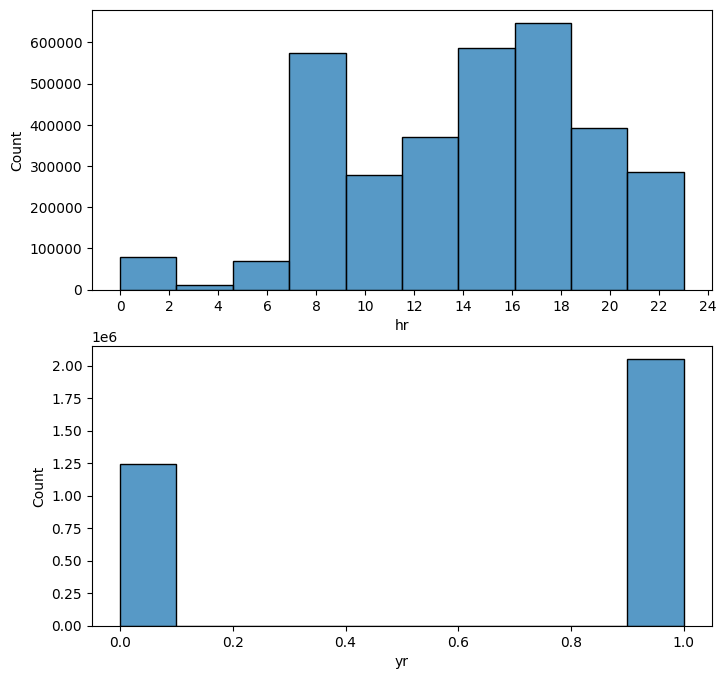

In [77]:
variables_to_target = ["hr", "yr"]
_, ax = plt.subplots(2, 1, figsize=(8, 8))
for i in range(len(variables_to_target)):
    sns.histplot(data=motorbike_df, x=variables_to_target[i], weights="cnt", ax=ax[i], palette='pastel6')
    ax[0].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])

Here we can see that the most amount of ambulance calls are in a range of [7, 23] hours. \
And also on the 2011 ambulance calls much less than year 2012, so we'll split it by two years.

<Axes: xlabel='cnt', ylabel='Density'>

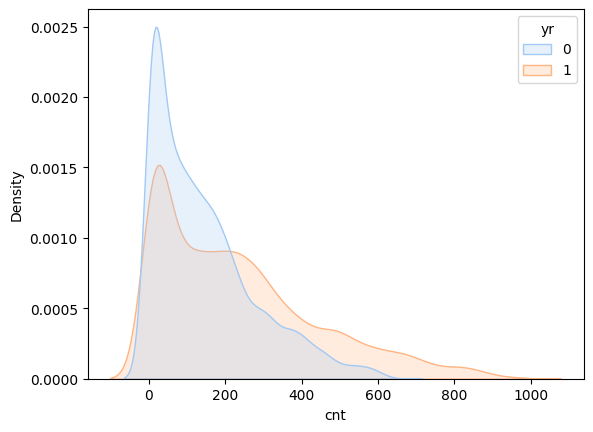

In [101]:
sns.kdeplot(data=motorbike_df, x='cnt', hue='yr', palette='pastel', fill=True)

In [120]:
motorbike_df_2011 = motorbike_df[motorbike_df["yr"] == 0]
motorbike_df_2012 = motorbike_df[motorbike_df["yr"] == 1]

motorbike_df_2011.to_csv("data/motorbike_2011.csv")
motorbike_df_2012.to_csv("data/motorbike_2012.csv")

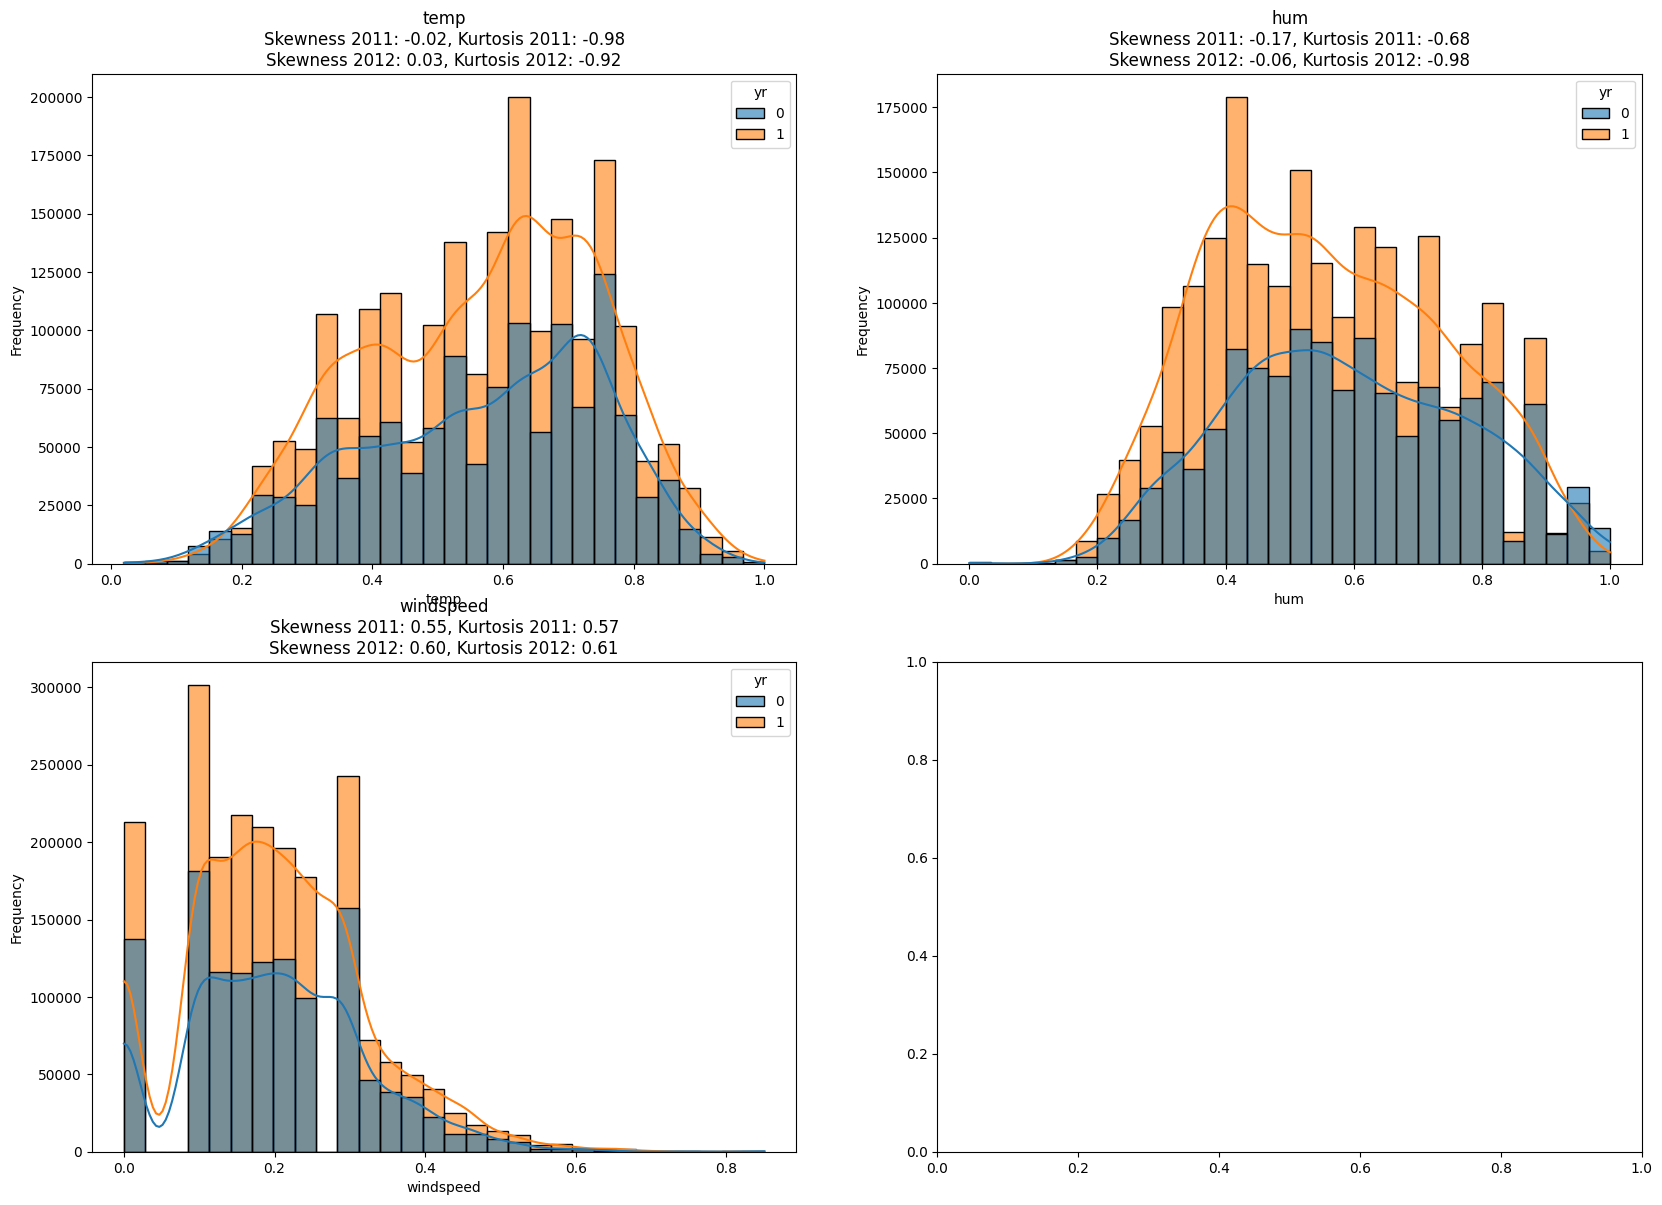

In [146]:
numerical_data = motorbike_df.loc[:, ["temp", "hum", "windspeed"]]
_, ax = plt.subplots(2, 2, figsize=(20, 14))

for col, subplot in zip(numerical_data.columns, ax.flatten()):
    data_2011 = motorbike_df[motorbike_df["yr"] == 0][col]
    data_2012 = motorbike_df[motorbike_df["yr"] == 1][col]

    col_skewness_2011 = skew(data_2011, nan_policy='omit')
    col_skewness_2012 = skew(data_2012, nan_policy='omit')

    col_kurtosis_2011 = kurtosis(data_2011, nan_policy='omit')
    col_kurtosis_2012 = kurtosis(data_2012, nan_policy='omit')

    sns.histplot(data=motorbike_df, x=col, kde=True, color='skyblue', weights="cnt", hue="yr", ax=subplot, bins=30, alpha=0.6)

    subplot.set_title(f"{col}\nSkewness 2011: {col_skewness_2011:.2f}, Kurtosis 2011: {col_kurtosis_2011:.2f}\n"
                      f"Skewness 2012: {col_skewness_2012:.2f}, Kurtosis 2012: {col_kurtosis_2012:.2f}")
    
    subplot.set_xlabel(col)
    subplot.set_ylabel('Frequency')

So, i've built two year hist plots with calculation of **Skewness** and **Kurtosis**. \
Let's start from **temp**: this features looks the most normal, the skew and kurtosis coefficients are very low. \
After that the **humidity**: this feature looking more interesting. In the 2012 everything looking fine, but in the 2011 we have **-0.17** skewness coefficient and kurtosis is **-0.68** which means longer tail to the left. If we think about the real life, the low humidity means that there is more dry air(what is safer if we're talking about weather conditions), but there was certain amount of calls that days. \
And the last but not least - **windspeed**: here we can see huge tail to the right, and corresponding coefficients of skewness and kurtosis aroung **0.5** each year. This one looks even more intersting than **humidity**.